In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [5]:
len(x_train)

60000

In [7]:
x_train[0].shape

(28, 28)

In [15]:
plt.matshow(x_train[0])


In [47]:
x_train.shape
x_train=x_train/255
x_test=x_test/255

In [49]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [51]:
x_train_flat.shape

(60000, 784)

In [53]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
               optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)
    
              


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8086 - loss: 0.7308
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.3146
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9235 - loss: 0.2722


In [55]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9152 - loss: 0.3035


[0.26633989810943604, 0.9258999824523926]

In [57]:
model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.8371725e-02, 2.8302452e-07, 4.0908787e-02, ..., 9.9980700e-01,
        6.6095300e-02, 6.5343714e-01],
       [4.8178691e-01, 6.5636025e-03, 9.9950808e-01, ..., 1.1642382e-12,
        1.4949463e-01, 3.8080432e-09],
       [3.6142810e-04, 9.9441576e-01, 6.8954921e-01, ..., 1.2881324e-01,
        3.5666013e-01, 4.8060849e-02],
       ...,
       [2.1119959e-06, 3.4461714e-06, 8.8530447e-04, ..., 1.5663092e-01,
        3.2325751e-01, 7.2523475e-01],
       [1.1627383e-04, 1.2987976e-04, 1.4714176e-04, ..., 4.1384585e-05,
        5.0844789e-01, 6.5597182e-05],
       [6.0487776e-03, 1.0250240e-10, 2.7738830e-01, ..., 1.4485393e-08,
        1.2452304e-04, 7.1193460e-07]], dtype=float32)

In [59]:
y_predicted=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
y_predicted[1]

array([4.8178691e-01, 6.5636025e-03, 9.9950808e-01, 3.3848536e-01,
       5.0967913e-10, 8.3659840e-01, 8.9216799e-01, 1.1642382e-12,
       1.4949463e-01, 3.8080432e-09], dtype=float32)

In [69]:
np.argmax(y_predicted[1])

2

In [73]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

In [77]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm                        

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    8,  936,   15,    7,    3,   11,    9,   33,    5],
       [   3,    0,   21,  924,    0,   23,    2,   10,   18,    9],
       [   2,    2,    8,    1,  911,    0,    7,    4,    5,   42],
       [   8,    3,    5,   33,    8,  781,   13,    6,   29,    6],
       [  10,    3,   11,    1,    7,   15,  908,    2,    1,    0],
       [   1,    9,   26,    7,    7,    1,    0,  942,    1,   34],
       [   8,   12,    8,   24,    9,   31,    8,   12,  854,    8],
       [  11,    7,    1,    9,   24,    8,    0,   22,    3,  924]])>

In [87]:
plt.close('all')

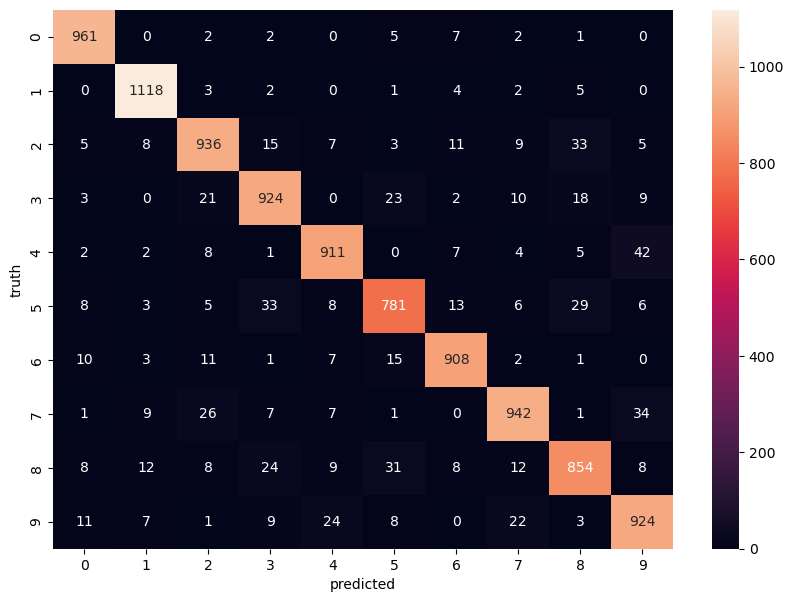

In [100]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [103]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
               optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)
    
              


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8249 - loss: 0.6989
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9368 - loss: 0.2171
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9539 - loss: 0.1589
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9647 - loss: 0.1207
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9710 - loss: 0.0987


In [105]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9643 - loss: 0.1213


[0.10535859316587448, 0.9696000218391418]

if you dont want to create a flattened array then you can use keras inbuild function ot make things easier for you guys



In [108]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
               optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)
    

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8349 - loss: 0.6919
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9365 - loss: 0.2200
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9528 - loss: 0.1627
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9643 - loss: 0.1253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9714 - loss: 0.1026
